In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import tensorflow as tf
import os

In [2]:
sz = 128
# Step 1 - Building the CNN


classifier = Sequential()


classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
batch_size = 16
img_height = 128
img_width = 128
data_dir='D:\B.Tech\MegaProject\DatasetNew\data\train'

In [5]:
data_dir='D:/B.Tech/MegaProject/DatasetNew/data/train'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',  
  image_size=(128, 128),
  batch_size=10)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',  
  image_size=(128, 128),
  batch_size=10)

Found 10800 files belonging to 27 classes.
Using 8640 files for training.
Found 10800 files belonging to 27 classes.
Using 2160 files for validation.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:/B.Tech/MegaProject/DatasetNew/data/train',target_size=(sz, sz),batch_size=10,color_mode='grayscale',class_mode='categorical')

test_set = test_datagen.flow_from_directory('D:/B.Tech/MegaProject/DatasetNew/data/test',target_size=(sz , sz),batch_size=10,color_mode='grayscale',class_mode='categorical')

Found 10800 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


In [7]:
epochs=5
history = classifier.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/5
1080/1080 [==============================] - 137s 126ms/step - loss: 1.3681 - accuracy: 0.5933 - val_loss: 0.0339 - val_accuracy: 0.9941
Epoch 2/5
1080/1080 [==============================] - 126s 116ms/step - loss: 0.3820 - accuracy: 0.8768 - val_loss: 0.0096 - val_accuracy: 0.9981
Epoch 3/5
1080/1080 [==============================] - 114s 106ms/step - loss: 0.2756 - accuracy: 0.9085 - val_loss: 0.0127 - val_accuracy: 0.9989
Epoch 4/5
1080/1080 [==============================] - 110s 102ms/step - loss: 0.2218 - accuracy: 0.9263 - val_loss: 0.0132 - val_accuracy: 0.9956
Epoch 5/5
1080/1080 [==============================] - 106s 98ms/step - loss: 0.1883 - accuracy: 0.9372 - val_loss: 0.0139 - val_accuracy: 0.9948


In [5]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

history = classifier.fit(training_set,
                        epochs = 15, validation_data =test_set,
                        callbacks =[earlystopping])


Epoch 1/15
1080/1080 [==============================] - 95s 87ms/step - loss: 1.3489 - accuracy: 0.5943 - val_loss: 0.1029 - val_accuracy: 0.9770
Epoch 2/15
1080/1080 [==============================] - 96s 89ms/step - loss: 0.3252 - accuracy: 0.8907 - val_loss: 0.0479 - val_accuracy: 0.9885
Epoch 3/15
1080/1080 [==============================] - 98s 91ms/step - loss: 0.2279 - accuracy: 0.9263 - val_loss: 0.0666 - val_accuracy: 0.9807
Epoch 4/15
1080/1080 [==============================] - 99s 91ms/step - loss: 0.1843 - accuracy: 0.9421 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 5/15
1080/1080 [==============================] - 96s 89ms/step - loss: 0.1535 - accuracy: 0.9531 - val_loss: 0.0222 - val_accuracy: 0.9926
Epoch 6/15
1080/1080 [==============================] - 97s 90ms/step - loss: 0.1416 - accuracy: 0.9532 - val_loss: 0.0297 - val_accuracy: 0.9904
Epoch 7/15
1080/1080 [==============================] - 97s 90ms/step - loss: 0.1193 - accuracy: 0.9624 - val_loss: 0.0627 -

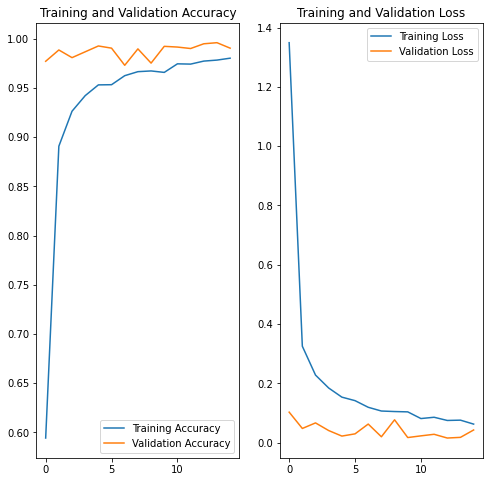

In [6]:
import matplotlib.pyplot as plt
epochs=15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
model_json = classifier.to_json()
with open("model-version3.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model-version3.h5')
print('Weights saved')

Model Saved
Weights saved


In [7]:
from keras.models import model_from_json
json_file = open("model-version2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("model-version2.h5")

In [10]:
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory('D:/B.Tech/MegaProject/DatasetNew/data/test',

                                                    target_size=(128, 128),

                                                    batch_size=1,
                                                    color_mode='grayscale',

                                                    class_mode='categorical', shuffle=False)

Found 2700 images belonging to 27 classes.


In [8]:
class_names = ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(class_names)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [11]:
import numpy as np
Y_pred = classifier.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_6672\1485976779.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = classifier.predict_generator(test_generator)


In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [15]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

Confusion Matrix


In [12]:
import matplotlib.pyplot as plt

Confusion matrix, without normalization


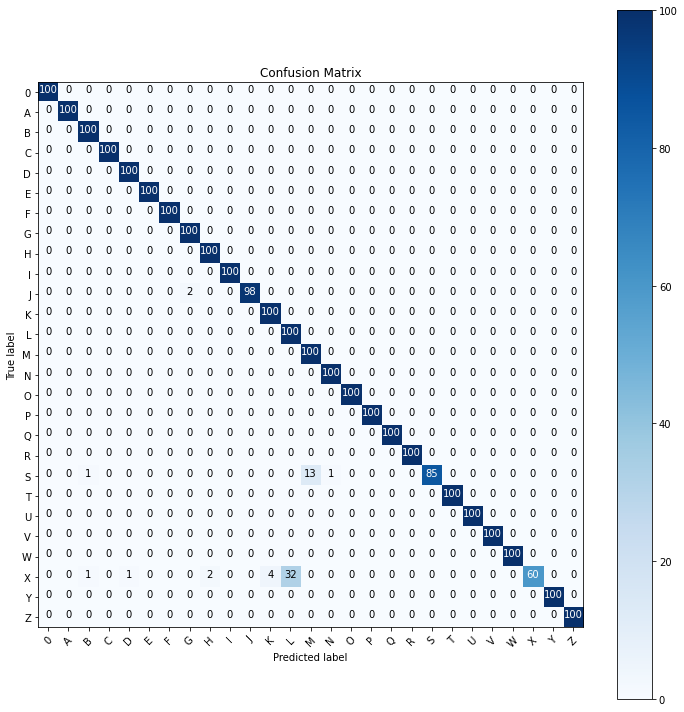

In [16]:
import itertools
plot_confusion_matrix(cm, class_names, title='Confusion Matrix')

In [17]:
from sklearn.metrics import classification_report

In [18]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           A       1.00      1.00      1.00       100
           B       0.98      1.00      0.99       100
           C       1.00      1.00      1.00       100
           D       0.99      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       0.98      1.00      0.99       100
           H       0.98      1.00      0.99       100
           I       1.00      1.00      1.00       100
           J       1.00      0.98      0.99       100
           K       0.96      1.00      0.98       100
           L       0.76      1.00      0.86       100
           M       0.88      1.00      0.94       100
           N       0.99      1.00      1.00       100
           O       1.00      1.00      1.00       100
           P       1.00      1.00      1.00       100
     